# EX 2.1

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
df = pd.read_csv('titanic.csv')
df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [19]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [20]:
df['sex'] = df['sex'].map({1: 1, 0: 0}) # 1: female, 0: male
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [21]:
X = df.drop('survived', axis=1)
y = df['survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = dt_model.predict(X_test)
holdout_acc = accuracy_score(y_test, y_pred)

In [25]:
print(f"Accuracy Score: {holdout_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7405

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       144
           1       0.74      0.65      0.69       118

    accuracy                           0.74       262
   macro avg       0.74      0.73      0.73       262
weighted avg       0.74      0.74      0.74       262



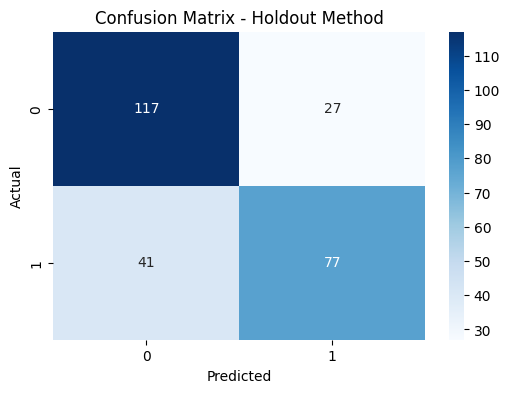

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Holdout Method')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# EX 2.2

In [27]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model_cv = DecisionTreeClassifier(random_state=42)

In [28]:
cv_results = cross_val_score(model_cv, X, y, cv=kfold, scoring='accuracy')

In [30]:
for i, score in enumerate(cv_results):
    print(f"Fold {i+1}: Accuracy = {score:.4f}")

Fold 1: Accuracy = 0.7710
Fold 2: Accuracy = 0.7557
Fold 3: Accuracy = 0.7252
Fold 4: Accuracy = 0.7405
Fold 5: Accuracy = 0.7023
Fold 6: Accuracy = 0.7328
Fold 7: Accuracy = 0.8015
Fold 8: Accuracy = 0.7557
Fold 9: Accuracy = 0.6336
Fold 10: Accuracy = 0.6769


In [31]:
print("-" * 30)
print(f"Mean Accuracy: {cv_results.mean():.4f}")
print(f"Standard Deviation: {cv_results.std():.4f}")

------------------------------
Mean Accuracy: 0.7295
Standard Deviation: 0.0460


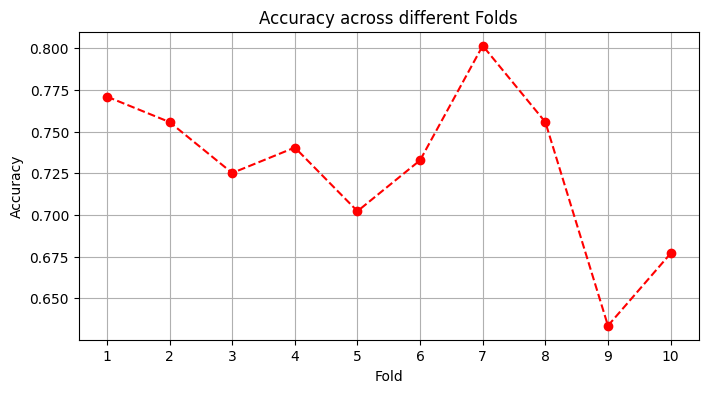

In [32]:
plt.figure(figsize=(8,4))
plt.plot(range(1, num_folds + 1), cv_results, marker='o', linestyle='--', color='red')
plt.title('Accuracy across different Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()